# Face Mask Detector using Transfer Learning.
### A Deep Learning project using Keras and Tensorflow
<br>
<br>
<img src="assets/images/Detected.png" width="500" height="500" align="center"/>
<br>
<br>

# Data Visualization

In [4]:
import matplotlib.pyplot as plt
import os, os.path

In [10]:
DIR1 = r'assets\dataset\with_mask'
with_mask = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

DIR1 = r'assets\dataset\without_mask'
without_mask = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

Text(0, 0.5, 'Count of Images')

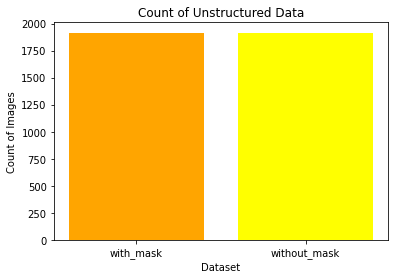

In [17]:
fig, ax = plt.subplots()
ax.bar(['with_mask', 'without_mask'], [with_mask, without_mask], color = ['#FFA500','#FFFF00'])
ax.set_title("Count of Unstructured Data")
ax.set_xlabel('Dataset') 
ax.set_ylabel('Count of Images')

In [28]:
DIRECTORY = r'assets\dataset'
imagePaths = list(paths.list_images(DIRECTORY))
jpgImg = len([os.path.splitext(img)[-1] for img in imagePaths if os.path.splitext(img)[-1] == '.jpg'])
pngImg = len([os.path.splitext(img)[-1] for img in imagePaths if os.path.splitext(img)[-1] == '.png'])
jpegImg = len([os.path.splitext(img)[-1] for img in imagePaths if os.path.splitext(img)[-1] == '.jpeg'])

Text(0, 0.5, 'Count of Images')

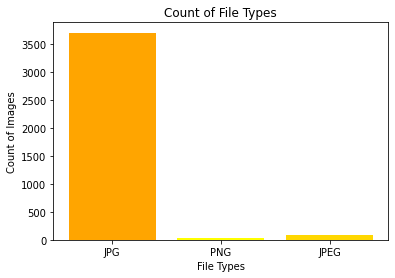

In [32]:
fig, ax = plt.subplots()
ax.bar(['JPG', 'PNG', 'JPEG'], [jpgImg, pngImg, jpegImg], color = ['#FFA500','#FFFF00', '#FFD700' ])
ax.set_title("Count of File Types")
ax.set_xlabel('File Types') 
ax.set_ylabel('Count of Images')

#### Importing Essential modules.

In [34]:
import numpy as np
import os
from imutils import paths

#### Initializing and declraing variables

In [35]:
DIRECTORY = r'assets\dataset'
imagePaths = list(paths.list_images(DIRECTORY))

data = [] #This list will contain images 
labels = [] # This list will contain category of images i.e 'with_mask' and 'without_mask'


In [3]:
imagePaths

['assets\\dataset\\without_mask\\0.jpg',
 'assets\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'assets\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'assets\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'assets\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'assets\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'assets\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0056.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0057.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0062.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0063.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0098.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0103.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0155.jpg',
 'assets\\dataset\\without_mask\\0_0_anhu_0157.jpg',

# Data Preprocessing

In [36]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

#### Selecting each image and storing it in data variable with labels as 'with mask' and 'without mask'

In [37]:
for i in imagePaths:
    label = i.split(os.path.sep)[-2]
    labels.append(label)
    
    image = load_img(i, target_size=(224,224)) #Load/copy the image with 224 width and 224 height
    image = img_to_array(image) #convert image to array
    image = preprocess_input(image) #reduces the size of images if its 227 then it will be 0.234 or anything according to origianl size
    data.append(image) #now add this image to a list of data

c:\dev\python\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


#### Conversion of data to array

In [7]:
#Convert the data and labels to numpy array because it need only array inputs to train model
data = np.array(data, dtype='float32')
labels = np.array(labels)

In [8]:
#Now lets have look at our input data to model
print("Data: ",data)
print("Labels:", labels)

Data:  [[[[-0.94509804 -0.9764706  -0.85882354]
   [-0.94509804 -0.9764706  -0.85882354]
   [-0.94509804 -0.9764706  -0.85882354]
   ...
   [-0.8509804  -0.90588236 -0.78039217]
   [-0.8509804  -0.90588236 -0.78039217]
   [-0.84313726 -0.8980392  -0.77254903]]

  [[-0.9137255  -0.94509804 -0.827451  ]
   [-0.9137255  -0.94509804 -0.827451  ]
   [-0.9137255  -0.94509804 -0.827451  ]
   ...
   [-0.7490196  -0.8039216  -0.6784314 ]
   [-0.7490196  -0.8039216  -0.6784314 ]
   [-0.7411765  -0.79607844 -0.67058825]]

  [[-0.92156863 -0.9607843  -0.8039216 ]
   [-0.92156863 -0.9529412  -0.81960785]
   [-0.92156863 -0.9607843  -0.8039216 ]
   ...
   [-0.88235295 -0.8980392  -0.7882353 ]
   [-0.85882354 -0.8901961  -0.77254903]
   [-0.85882354 -0.8745098  -0.7647059 ]]

  ...

  [[ 0.38823533 -0.9607843  -0.36470586]
   [ 0.38823533 -0.9607843  -0.3960784 ]
   [ 0.37254906 -0.9529412  -0.44313723]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.  

#### Working on labels

In [9]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

lb = LabelBinarizer() #creates object of class labelBinarizer
labels = lb.fit_transform(labels) #analyses the pattern of labels means checks how many categories are there
labels = to_categorical(labels) #and according to categories this method will apply 1's and 0's to categories

#foe eg. we have two categories with_mask and without_mask so it will categorize it into 2 categories and gives 0 to without mask and 1 to with mask
#If we had more categories then 3 would be given to another category and 4 to other and so on...

#### Dividing data and labels into 80-20

In [10]:
from sklearn.model_selection import train_test_split
#Now lets divide data and labels into 80% and 20%
#here stratify means it keeps state of labels means how many labels of with mask and without mask are passed in this method 
#this is used because we are passing random state
train_X, test_X, train_Y, test_Y = train_test_split(data, labels, test_size=0.20, random_state=10, stratify=labels)

In [12]:
#Lets check contents of trainY and trainY
print("trainX: ",train_X.shape)
print("trainY: ",train_Y.shape)

trainX:  (3066, 224, 224, 3)
trainY:  (3066, 2)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Changing Image properties

In [14]:
aug = ImageDataGenerator(rotation_range=20,
                        zoom_range=0.15,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.15,
                        horizontal_flip=True,
                        vertical_flip=True,
                        fill_mode='nearest')
#fill_mode when the image shifts 0.2 from width or height then the remaining blank space is replaced by the nearest pixels of image
#shear will make .15 part image to move ahead and remaining part to back

### This are the images after performing Augmentation on Images.

##### 1) Rotated Image
<img src="assets/images/rotation.png" width="500" height="500" align="left"/>

##### 2) Zoomed Image
<img src="assets/images/zoom.png" width="500" height="500" align="left"/>

##### 3) Shifted Image
<img src="assets/images/shift.png" width="500" height="500" align="left"/>

##### 4) Sheared Image
<img src="assets/images/shear.png" width="200" height="200" align="left"/>

##### 5) Flipped Image
<img src="assets/images/flip.png" width="500" height="500" align="left"/>

##### 6) Fill mode Image
<img src="assets/images/fillmode.png" width="500" height="500" align="left"/>








# Using MobileNetV2 Model

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

In [18]:
#train our CNN Model
#firstly we will import base model i.e mobilenetV2 without top layer
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#weights is just a parameter that loads imagenet and imagent is a model with pretrained thousands of images
#include_top this will remove the top layer from our model means we are just to use the pretrained layers
#input_tensor this tells to use image as input with shape 224 224 3

9412608/9406464 [==============================] - 23s 2us/step


In [19]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### MobilenetV2 Architecture
<img src="assets/images/mobilenetv2.png" width="350" height="350" align="left"/>

In [22]:
headModel = baseModel.output #so after removing top layer, whatever the o/p above layers are giving we are storing that outputs to basemodel in smple sords connecting basemodel with  our own model

#### Adding our own layers to it

In [23]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [24]:
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
#poolin is basically use to reduce size of data
#to calculate average of features, we have to find average matrix(1x1 cause we have only twpo o/p) from 7x7 matrix with help of headModel(we have features in it)
#If we use all the features then it will increase the complexity of the model, increase size of model, uses more computation power

### Average Pooling
<img src="assets/images/AveragePooling2D.png" width="500" height="500" align="left"/>

In [25]:
headModel = Flatten(name='Flatten')(headModel)
#it is used to convert the data in 1D array and inputing it to the next layer
headModel = Dense(128, activation='relu')(headModel)
#it is a relu dense layer to improve performance of Model we use random weights and relu to model such that it can achieve low training loss

### Flattening and Densing
<img src="assets/images/Flattening and Densing.png" width="500" height="500" align="left"/>

In [26]:
headModel = Dropout(0.5)(headModel)
#prevents Model from overfitting
#overfitting is when the model memorizes the features it does not learn them, so to prevent that we have to add dropout layer with 0.5 drop
#It will drop hidden layers or extra layers(neurons) from model

### Dropout
<img src="assets/images/dropout.png" width="300" height="300" align="left"/>

In [27]:
headModel = Dense(2,activation='softmax')(headModel)
#we have perform densing here because noe there are multiple neurons in model so to now to make only two output we have to use softmmax and 2 as parameters
#this softmax works on probability means there are chances of 50-60% of wearing masks then it will activate with mask neuron or if chances are below 50% then it will activate without mask neuron

### Softmax dense layer
<img src="assets/images/softmax.png" width="300" height="300" align="left"/>

#### Creating Final Model

In [28]:
from tensorflow.keras.models import Model
#Now our whole model is ready to train, lets store it in a variable
model = Model(inputs=baseModel.input, outputs=headModel)

#### Disabling upper layers to get trained

In [29]:
#this for loop says that we are not training the layers imported from MobileNetv2 as this layers already have features
for layer in baseModel.layers:
    layer.trainable = False

In [30]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [31]:
#weight is a random number between 0-1 which is applied between neurons and it represents strength of connection between 2 neurons

learning_rate = 0.001 #controls how much to change the model in response to the estimated error each time the model weights are updated
Epochs = 20 #how many times your model go through the dataset
BS = 12 #This is number of images passing to model to train

#### Using Adam Optimiser

In [32]:
from tensorflow.keras.optimizers import Adam

In [33]:
#so optimizer is an algorithm that is used to change attr of NN such as weights and learning rate to reduce losses
#In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights
#we are using adam optimizer becuase it is efficient, consumes low memory, well suited for large data, easy to implement
opt = Adam(learning_rate=learning_rate, decay=learning_rate/Epochs) #decay means to reduce learning rate to get more accurate steps

# Data Modeling 

#### Compiling Model

In [34]:
#loss param cause we have 2 binary o/p i.e WM and WiM, optimizer is our Adam, and metrics[accuracy] means we want to get accuracy of model. 
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy']) 

#### Executing/Training Model

In [35]:
#here aug.flow means to load BS means 12 images from training data and perform ImageAugmentation on it.
#here steps per epoch means If 83 steps are selected then the network will train for 83 images to complete one epoch.
model.fit(aug.flow(train_X, train_Y, batch_size=BS),
          steps_per_epoch=len(train_X)//BS,
          validation_data=(test_X,test_Y),
          validation_steps=len(test_X)//BS,
          epochs=Epochs)
model.save(r'mask_detector.model')

Epoch 1/20
255/255 [==============================] - 192s 728ms/step - loss: 0.1899 - accuracy: 0.9316 - val_loss: 0.0701 - val_accuracy: 0.9791
Epoch 2/20
255/255 [==============================] - 144s 562ms/step - loss: 0.1007 - accuracy: 0.9679
Epoch 3/20
255/255 [==============================] - 131s 512ms/step - loss: 0.0720 - accuracy: 0.9745
Epoch 4/20
255/255 [==============================] - 116s 453ms/step - loss: 0.0634 - accuracy: 0.9774
Epoch 5/20
255/255 [==============================] - 122s 479ms/step - loss: 0.0739 - accuracy: 0.9761
Epoch 6/20
255/255 [==============================] - 126s 494ms/step - loss: 0.0614 - accuracy: 0.9797
Epoch 7/20
255/255 [==============================] - 134s 527ms/step - loss: 0.0471 - accuracy: 0.9830
Epoch 8/20
255/255 [==============================] - 129s 507ms/step - loss: 0.0500 - accuracy: 0.9820
Epoch 9/20
255/255 [==============================] - 133s 523ms/step - loss: 0.0436 - accuracy: 0.9843
Epoch 10/20
255/255 [=

c:\dev\python\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:\Stuff\Face Mask Detector\mobilenetv2.model\assets


In [36]:
from sklearn.metrics import classification_report

#### Performing prediction on test data for accuracy

In [37]:
predict = model.predict(test_X, batch_size=BS) #predicts the image that is wearuing mask or not
predict=np.argmax(predict, axis=1) #returns the index of max value on axis 1
print(classification_report(test_Y.argmax(axis=1),predict, target_names=lb.classes_))
print("HI")
#compare this both test_Y and predict if both are same then print the label

              precision    recall  f1-score   support

   with_mask       0.96      1.00      0.98       383
without_mask       1.00      0.96      0.98       384

    accuracy                           0.98       767
   macro avg       0.98      0.98      0.98       767
weighted avg       0.98      0.98      0.98       767

HI


In [ ]:
# PRECISION: What percent of your predictions were correct
# RECALL: What percent of the positive cases did you catch means how many were correctly identified
# F1: What percent of positive predictions were correct
# Support: is the number of actual occurrences of the class/labels in the specified dataset